In [1]:
 #Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# from google.colab import files
from pandas.api.types import CategoricalDtype
# from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix
import dill

In [2]:
#Read the Dataset
df = pd.read_csv(r'C:\Users\mehed\Google Drive\Colab Notebooks\Lending Club Data\df_final.csv')

In [3]:
# check first look of the processed data
df.head()

,loan_amnt,term,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,fico_range_high,revol_util,application_type,mort_acc,pub_rec_bankruptcies,debt_settlement_flag,credit_hist
0,5000.0,36,6,10,3,24000.0,0,0,27.65,739.0,83.7,0,0.0,0,0,9830
1,2500.0,60,13,1,3,30000.0,0,1,1.00,744.0,9.4,0,0.0,0,0,4627
2,2400.0,36,14,10,3,12252.0,1,0,8.72,739.0,98.5,0,0.0,0,0,3682
3,10000.0,36,10,10,3,49200.0,0,0,20.00,694.0,21.0,0,0.0,0,0,5782
4,3000.0,60,9,1,3,80000.0,0,0,17.94,699.0,53.9,0,0.0,0,0,5813


In [4]:
#check for the shape
df.shape

(1848821, 16)

In [5]:
#Check the description of the data
df.describe(include = 'all')

,loan_amnt,term,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,fico_range_high,revol_util,application_type,mort_acc,pub_rec_bankruptcies,debt_settlement_flag,credit_hist
count,1.848821e+06,1.848821e+06,1.848821e+06,1.848821e+06,1.848821e+06,1.848821e+06,1.848821e+06,1.848821e+06,1.848821e+06,1.848821e+06,1.848821e+06,1.848821e+06,1.848821e+06,1.848821e+06,1.848821e+06,1.848821e+06
mean,1.458146e+04,4.201604e+01,1.040962e+01,5.647188e+00,3.713415e+00,7.740315e+04,3.156812e-01,1.948463e-01,1.856104e+01,7.016468e+02,5.048592e+01,3.626473e-02,1.566258e+00,1.240747e-01,2.765276e-02,5.949580e+03
std,8.961882e+03,1.040155e+01,6.341359e+00,3.756084e+00,6.537499e-01,1.179188e+05,4.647867e-01,3.960825e-01,1.303023e+01,3.269173e+01,2.478430e+01,1.869482e-01,1.937486e+00,3.296669e-01,1.639759e-01,2.770458e+03
min,5.000000e+02,3.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.340000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.095000e+03
25%,7.950000e+03,3.600000e+01,6.000000e+00,2.000000e+00,3.000000e+00,4.600000e+04,0.000000e+00,0.000000e+00,1.182000e+01,6.740000e+02,3.170000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.108000e+03
50%,1.200000e+04,3.600000e+01,1.000000e+01,5.000000e+00,4.000000e+00,6.500000e+04,0.000000e+00,0.000000e+00,1.771000e+01,6.940000e+02,5.060000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.387000e+03
75%,2.000000e+04,6.000000e+01,1.400000e+01,1.000000e+01,4.000000e+00,9.200000e+04,1.000000e+00,0.000000e+00,2.428000e+01,7.190000e+02,6.960000e+01,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,7.336000e+03
max,4.000000e+04,6.000000e+01,3.400000e+01,1.000000e+01,5.000000e+00,1.100000e+08,1.000000e+00,1.000000e+00,9.990000e+02,8.500000e+02,8.923000e+02,1.000000e+00,6.100000e+01,1.000000e+00,1.000000e+00,3.040800e+04


In [6]:
#Check the Loan status Percentage
df.loan_status.value_counts(normalize=True)

0    0.805154
1    0.194846
Name: loan_status, dtype: float64

Loan Status
 0    1488585
1     360236
Name: loan_status, dtype: int64


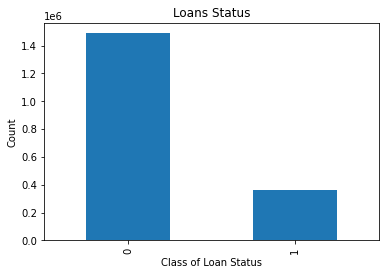

In [7]:
#Check the Loan Status
print("Loan Status\n",df.loan_status.value_counts())

df.loan_status.value_counts().plot.bar()
plt.title('Loans Status')
plt.xlabel('Class of Loan Status')
plt.ylabel('Count')
plt.show()

In [8]:
#Differentiate the target column class to check the size of each class. 
df_paid = df[df.loan_status == 0]
df_default = df[df.loan_status == 1]

In [9]:
#Upsample the total Dataset according to the target 'Default" size.  
df_default_upsmaple = resample(df_default, replace = True, n_samples = 1488585, random_state = 2018)
df_upsmaple = pd.concat([df_default_upsmaple, df_paid])
df_upsmaple.loan_status.value_counts()

0    1488585
1    1488585
Name: loan_status, dtype: int64

In [10]:
df_upsmaple.loan_status.value_counts()

0    1488585
1    1488585
Name: loan_status, dtype: int64

**Model Evaluation Function**

In [11]:
#Create a Evaluation model metrics function. It will provide AUC-ROC Score, Classification Report with Confusion Matrix.
def model_metrics(name,ytest, ypred, ypred_proba = None,):
    if ypred_proba is not None:
        print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, ypred_proba[:, 1])))
    print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred)))
    print('Classification report: \n{}\n'.format(classification_report(ytest, ypred)))
    print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred)))
    data = confusion_matrix(ytest, ypred)
    df_cm = pd.DataFrame(data, columns=np.unique(ytest), index = np.unique(ypred))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    plt.title('Confusion Matrix of '+f'{name}')
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, cmap="Greens", annot=True,fmt='g',annot_kws={"size": 16})# font size

In [12]:
#define a Function to plot the ROC curve of the selected model.
def plot_roc_curve(name, ytest, ypred_proba):
    fpr, tpr, thresholds = roc_curve(ytest, ypred_proba[:, 1])
    plt.subplots(1, figsize=(10,10))
    plt.title('ROC Curve of '+f'{name}')
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()

In [13]:
#Differentiate the Traget column and Dependent Features.
X_upsample = df_upsmaple.drop('loan_status', axis = 1)
Y_upsample = df_upsmaple.loan_status

In [14]:
#Test-Train Split
xtrain, xtest, ytrain, ytest = train_test_split(X_upsample, Y_upsample, test_size=0.2, random_state=0)

In [15]:
#Standardize the dataset with standard scaler.
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)

In [16]:
# Save scaler to pipeline for the website
with open('scaler_up.pkl', 'wb') as f:
  dill.dump(scaler, f, protocol=-1)
  f.close()

In [17]:
#Standardize the test dataset with standard scaler.
xtest_scaled = scaler.transform(xtest)

In [18]:
#Check the shape of Upsampled data.
df_upsmaple.shape

(2977170, 16)

**Logistic Regression Model**

In [19]:
#Define the Logistics Regression.
model_lr = "Logistic Regression"
lr = LogisticRegression()
lr.fit(xtrain_scaled, ytrain)

lr_pred = lr.predict(xtest_scaled)
lr_pred_proba = lr.predict_proba(xtest_scaled)

ROC-AUC score of the model: 0.746699981027666
Accuracy of the model: 0.674313190042893

Classification report: 
              precision    recall  f1-score   support

           0       0.66      0.73      0.69    297900
           1       0.70      0.61      0.65    297534

    accuracy                           0.67    595434
   macro avg       0.68      0.67      0.67    595434
weighted avg       0.68      0.67      0.67    595434


Confusion matrix: 
[[218569  79331]
 [114594 182940]]



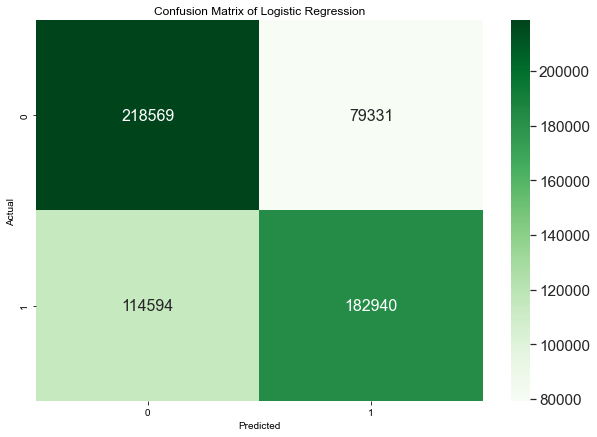

In [20]:
#Check the Performence of the Logistics Regression Model over the Downsampled Dataset.
model_metrics(model_lr, ytest, lr_pred,lr_pred_proba)

No handles with labels found to put in legend.


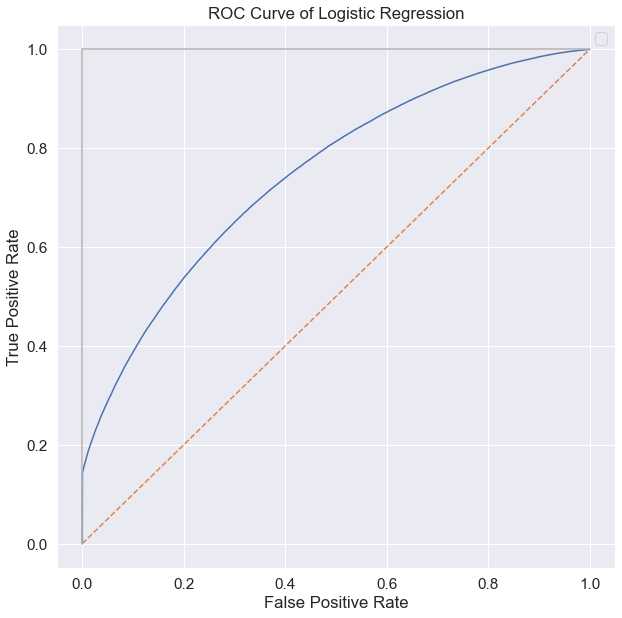

In [21]:
#Plotting the ROC curve.
plot_roc_curve(model_lr, ytest, lr_pred_proba)

**Random Forest Model**

In [22]:
# Define the Random Forest Algorithm Over the dataset.
model_rf = "Random Forest"
def random_forest(xtrain, xtest, ytrain):
    rf_params = {
        'n_estimators': 152, 
        'max_depth': 18
    }

    rf = RandomForestClassifier(**rf_params)
    rf.fit(xtrain, ytrain)
    rfpred = rf.predict(xtest)
    rfpred_proba = rf.predict_proba(xtest)
    
    return rfpred, rfpred_proba

In [23]:
#Customize the parameter of Random Forest Algorithm.
rf_params = {'n_estimators': 152, 'max_depth': 18}
rf = RandomForestClassifier(**rf_params)

In [24]:
#Fit the RF model over the Dataset.
rfpred, rfpred_proba = random_forest(xtrain_scaled, xtest_scaled, ytrain)

ROC-AUC score of the model: 0.8352680332038431
Accuracy of the model: 0.748984774131138

Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75    297900
           1       0.75      0.75      0.75    297534

    accuracy                           0.75    595434
   macro avg       0.75      0.75      0.75    595434
weighted avg       0.75      0.75      0.75    595434


Confusion matrix: 
[[224176  73724]
 [ 75739 221795]]



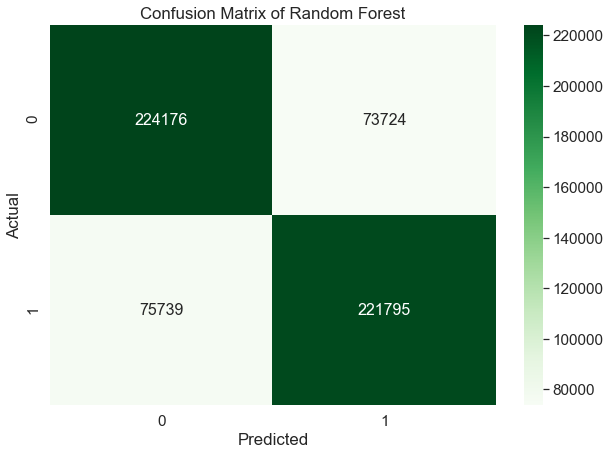

In [25]:
#Check the model Performence.
model_metrics(model_rf,ytest, rfpred, rfpred_proba)

No handles with labels found to put in legend.


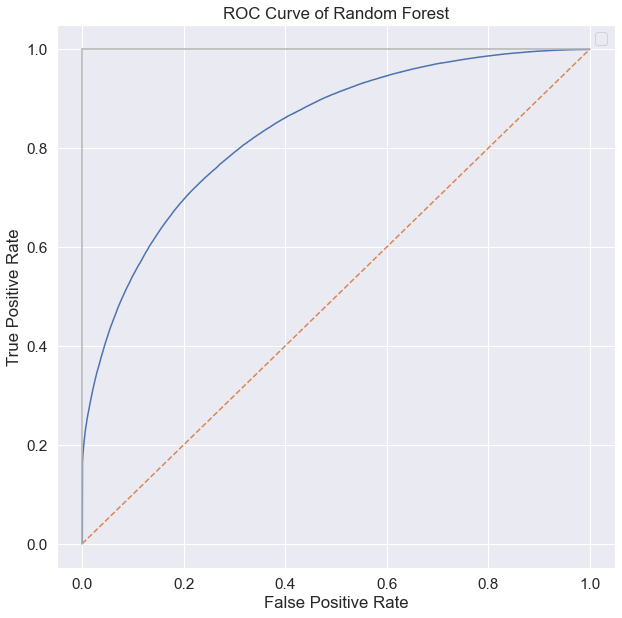

In [26]:
#Plotting the ROC curve.
plot_roc_curve(model_rf, ytest, rfpred_proba)

**Cross Validation of Random Forest Model**

In [27]:
#Cross-Valodate the RF Model in order to check the overfitting over training dataset.
rf_score = ['accuracy', 'recall', 'roc_auc', 'f1']
rf_cv_result = cross_validate(rf, X = xtrain_scaled, y = ytrain, scoring=rf_score,
                         cv = 5, return_train_score = False, verbose = 10, n_jobs= -1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 32.7min remaining: 49.1min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 32.9min remaining: 21.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 61.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 61.8min finished


In [28]:
#Check the Cross-Validation Score.
rf_cv_result

{'fit_time': array([1884.64484501, 1891.68041611, 1893.93931794, 1878.72583508,
        1640.64167142]),
 'score_time': array([ 70.79591203,  71.78006172,  71.99876356,  70.87402368,
        105.36059022]),
 'test_accuracy': array([0.74493018, 0.747178  , 0.74667837, 0.74556783, 0.74691979]),
 'test_recall': array([0.74223273, 0.74411654, 0.74469166, 0.74323496, 0.7441837 ]),
 'test_roc_auc': array([0.83028054, 0.83240942, 0.83156472, 0.83094415, 0.83249191]),
 'test_f1': array([0.74426984, 0.74643062, 0.74620311, 0.745002  , 0.74625446])}

In [29]:
#Print out the average result of Cross Validation to compare the result of test dataset.
print('F1 score# (1) mean: {} (2)variance: {}'.format(np.mean(rf_cv_result['test_f1']), np.var(rf_cv_result['test_f1'])))
print('Recall score# (1) mean: {} (2)variance: {}'.format(np.mean(rf_cv_result['test_recall']), np.var(rf_cv_result['test_recall'])))
print('Accuracy score# (1) mean: {} (2)variance: {}'.format(np.mean(rf_cv_result['test_accuracy']), np.var(rf_cv_result['test_accuracy'])))

F1 score# (1) mean: 0.7456320070619489 (2)variance: 7.207579859278063e-07
Recall score# (1) mean: 0.7436919170205059 (2)variance: 7.519368913893262e-07
Accuracy score# (1) mean: 0.746254833165664 (2)variance: 7.400942534546386e-07


**LightGMB Model**

In [30]:
#Import LightGBM library.
import lightgbm

In [31]:
#Customize the parameter of LGBM Model. 
light_gbm_params = {
    'boosting_type' : 'gbdt',
    'objective': 'binary',
    'max_depth': 100,
    'num_leaves' : 200,
    'learning_rate' : 0.05,
    'n_estimators': 9000,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq': 1,
}

In [32]:
#define the model variables.
model_lgbm = 'Light GBM'
light_gbm = lightgbm.LGBMClassifier(**light_gbm_params)

In [33]:
#Fit the LightGBM over the dataset.
light_gbm.fit(xtrain_scaled, ytrain)

[LightGBM] [Warning] feature_fraction is set=0.64, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.64
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.64,
               learning_rate=0.05, max_depth=100, n_estimators=9000,
               num_leaves=200, objective='binary')

**Test the Model with Test Data**

In [34]:
#Fit the LightGBM over the dataset.
light_gbm.fit(xtrain_scaled, ytrain)

LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.64,
               learning_rate=0.05, max_depth=100, n_estimators=9000,
               num_leaves=200, objective='binary')

In [35]:
#Test the Model performence over test dataset.
light_gbm_pred = light_gbm.predict(xtest_scaled)

In [36]:
#Predicting the Probability of each target class 
light_gbm_pred_proba = light_gbm.predict_proba(xtest_scaled)

ROC-AUC score of the model: 0.9337483644764395
Accuracy of the model: 0.8563955031120157

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.85    297900
           1       0.84      0.88      0.86    297534

    accuracy                           0.86    595434
   macro avg       0.86      0.86      0.86    595434
weighted avg       0.86      0.86      0.86    595434


Confusion matrix: 
[[248779  49121]
 [ 36386 261148]]



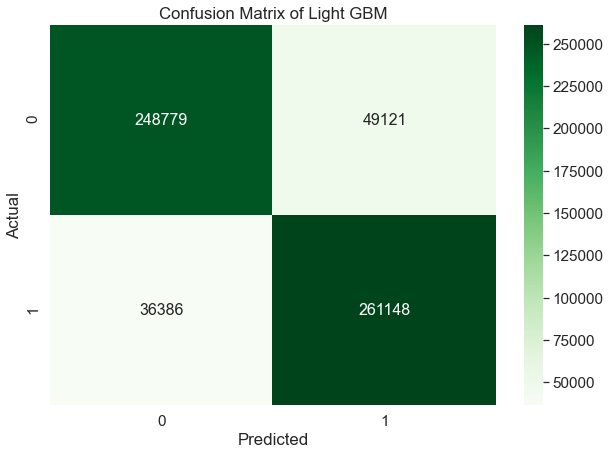

In [37]:
#Check the Model Performence.
model_metrics(model_lgbm,ytest, light_gbm_pred, light_gbm_pred_proba)

No handles with labels found to put in legend.


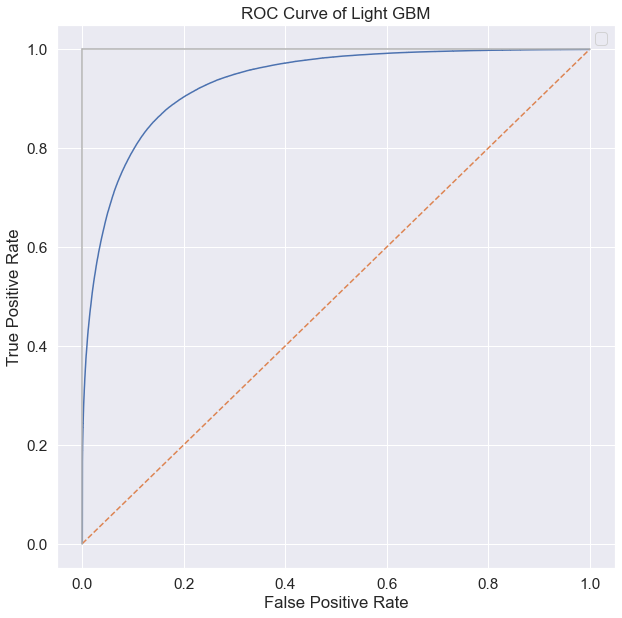

In [38]:
#Plotting the ROC curve.
plot_roc_curve(model_lgbm, ytest, light_gbm_pred_proba)

In [39]:
# seting the threshold to predict the class label.
threshold =.40
thrs_pred= [1 if val >=threshold else 0  for val in light_gbm_pred_proba[:,1]]

ROC-AUC score of the model: 0.9337483644764395
Accuracy of the model: 0.8267767712290531

Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.71      0.80    297900
           1       0.76      0.95      0.85    297534

    accuracy                           0.83    595434
   macro avg       0.85      0.83      0.82    595434
weighted avg       0.85      0.83      0.82    595434


Confusion matrix: 
[[210330  87570]
 [ 15573 281961]]



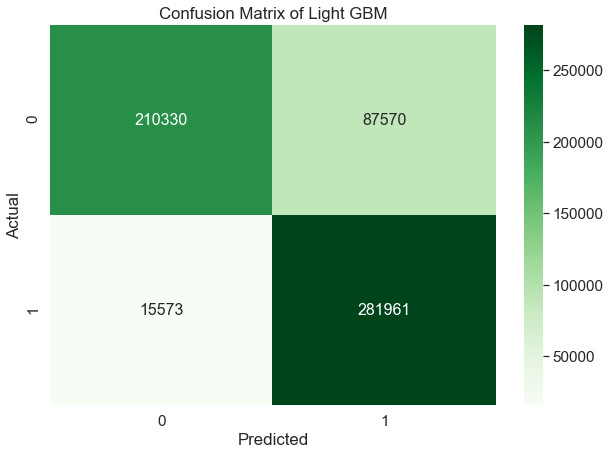

In [40]:
#Check the Model Performence with threshold.
model_metrics(model_lgbm, ytest, thrs_pred, light_gbm_pred_proba)

No handles with labels found to put in legend.


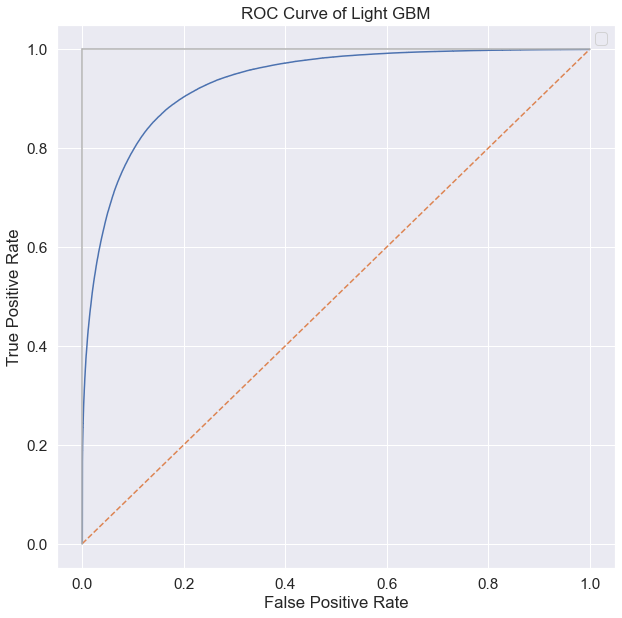

In [41]:
#Plotting the ROC curve.
plot_roc_curve(model_lgbm, ytest, light_gbm_pred_proba)

In [42]:
# Save model pipeline
with open('model_up.pkl', 'wb') as f:
  dill.dump(light_gbm, f, protocol=-1)
  f.close()

In [43]:
#Try to unpickle the saved model to check this one is working or not.
Unpickle = dill.load(open('model_up.pkl', "rb"))

**Cross Validation of LightGBM**

In [44]:
##Cross-Valodate the RF Model in order to check the overfitting over training dataset.
cv_lgbm = list(KFold(5, shuffle=True, random_state=2016)\
             .split(xtrain_scaled, ytrain))

[LightGBM] [Warning] feature_fraction is set=0.64, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.64
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

cv: 0

ROC-AUC score of the model: 0.927422043827342
Accuracy of the model: 0.8493097483352507

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.83      0.85    237981
           1       0.84      0.87      0.85    238367

    accuracy                           0.85    476348
   macro avg       0.85      0.85      0.85    476348
weighted avg       0.85      0.85      0.85    476348


Confusion matrix: 
[[197311  40670]
 [ 31111 207256]]

[LightGBM] [Warning] feature_fraction is set=0.64, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.64
[LightGBM] [Warning

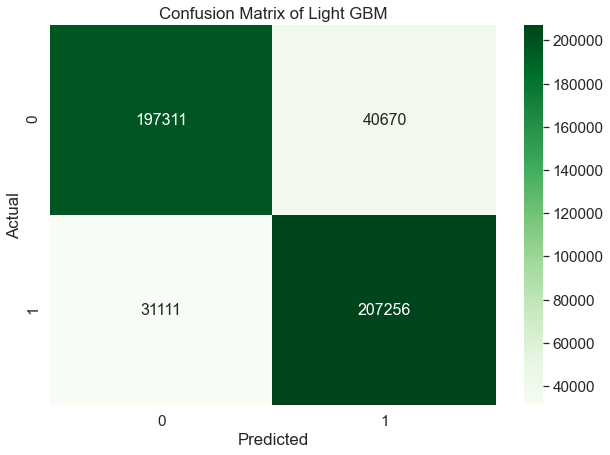

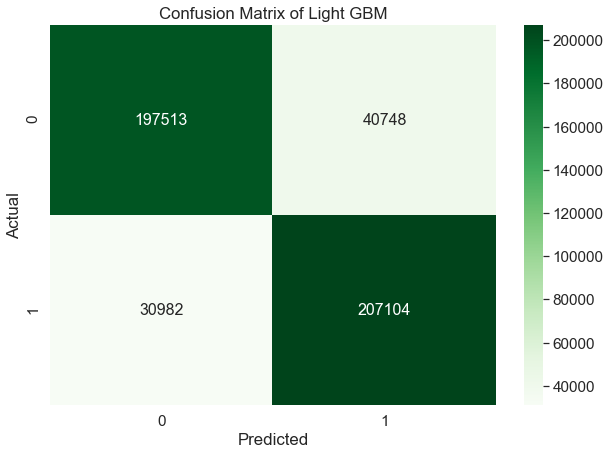

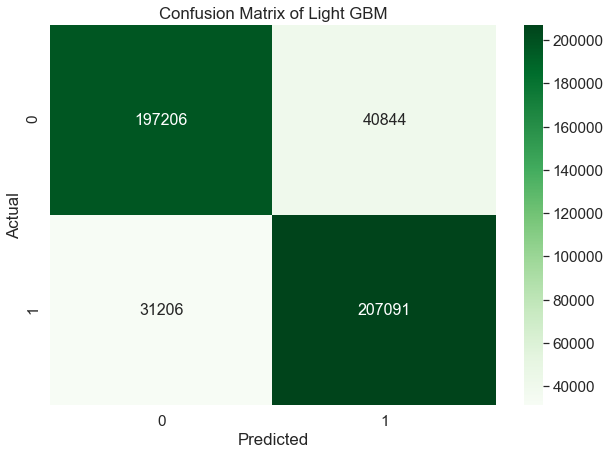

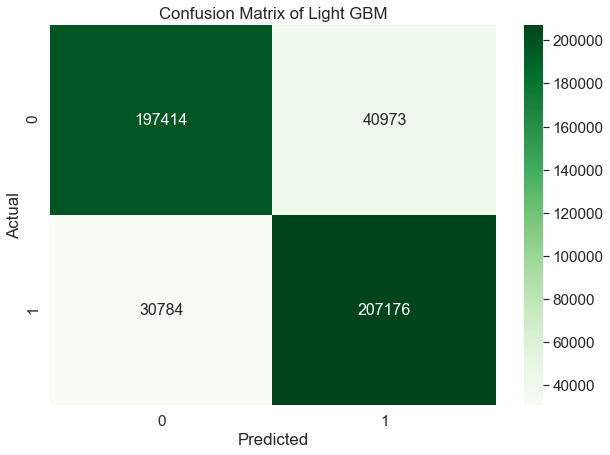

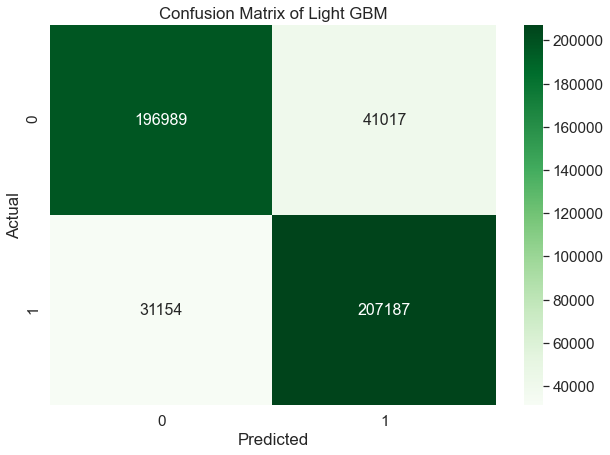

In [45]:
#Check the LightGBM Cross-Validation Result over Training set.
for i, (train_idx, valid_idx) in enumerate(cv_lgbm):
    
    ytrain = np.array(ytrain)
    X_train = xtrain_scaled[train_idx]
    y_train = ytrain[train_idx]
    X_valid = xtrain_scaled[valid_idx]
    y_valid = ytrain[valid_idx]
    
    light_gbm.fit(X_train, y_train)
    pred = light_gbm.predict(X_valid)
    pred_proba = light_gbm.predict_proba(X_valid)
    
    print('\ncv: {}\n'.format(i))
    model_metrics(model_lgbm,y_valid, pred, pred_proba)